In [1]:
import nibabel as nib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
import math

In [2]:
project_dir = '/home/ROBARTS/myousif/projects_inprogress/hippocharts/'
project_data_dir = os.path.join(project_dir,'data/training_data')

In [3]:
all_datasets_path = os.path.abspath('/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/')

datasets_path_names = ['AOMIC/ds002785','AOMIC/ds002790','AOMIC/ds003097','cam-can','hcp1200','hcp_aging','mpi_leipzig','neurocog_aging','narratives','QTIM']
datasets_path_list = [os.path.join(all_datasets_path,dset) for dset in datasets_path_names]

datasets_names = ['aomic_piop1','aomic_piop2','aomic_id1000','cam-can','hcp1200','hcp_aging','mpi_leipzig','neurocog_aging','narratives','qtim']
datasets_paths = dict(zip(datasets_names,datasets_path_list))

In [4]:
hippunfold_path = lambda direc: os.path.join(os.path.abspath(direc),'derivatives/hippunfold/hippunfold')
diff_path = lambda direc, metric='FA': os.path.join(os.path.abspath(direc),f'derivatives/hipposample')

In [5]:
master_participant_df = pd.read_csv(os.path.join(project_data_dir,'master_participants_data.csv'),index_col=0)

In [6]:
def glob_metric(hippunfold_dir,den='0p5mm',metric='thickness',space='T1w',label='hipp',ext='.dscalar.nii',desc=None,smooth='1mm'):
    
    if desc == None:
        paths = glob(os.path.join(hippunfold_dir, f'sub-*/surf/sub-*_space-{space}_den-{den}_label-{label}_{metric}{ext}'))
        if paths == []:
            paths = glob(os.path.join(hippunfold_dir, f'sub-*/ses-*1/surf/sub-*_ses-*1_space-{space}_den-{den}_label-{label}_{metric}{ext}'))
    else:
        paths = glob(os.path.join(hippunfold_dir, f'sub-*/surf/sub-*_space-{space}_den-{den}_label-{label}_desc-{desc}_smooth-{smooth}_{metric}{ext}'))
        if paths == []:
            paths = glob(os.path.join(hippunfold_dir, f'sub-*/ses-*1/surf/sub-*_ses-*1_space-{space}_den-{den}_label-{label}_desc-{desc}_smooth-{smooth}_{metric}{ext}'))
    
    try:
        paths = sorted(paths)
        subjects = [ p.split('/')[-1].split('_')[0] for p in paths]
    except:
        subjects = []
    
    return pd.DataFrame({'participant_id':subjects, 'paths':paths})

In [43]:
vol_paths = []
for idx, key in enumerate(datasets_paths):
    dset_paths = glob(os.path.join(datasets_paths[key], 'derivatives/hippunfold/hippunfold/sub-*/anat/sub-*_volumes.tsv'))
    vol_paths.append(dset_paths)

In [72]:
vol_paths[7] = glob(os.path.join(datasets_path_list[7],'derivatives/hippunfold/hippunfold/sub-*/ses-*/anat/sub-*_volumes.tsv'))
vol_paths[9] = glob(os.path.join(datasets_path_list[9],'derivatives/hippunfold/hippunfold/sub-*/ses-*/anat/sub-*_volumes.tsv'))

In [82]:
vol_dfs = []
for dset_idx, dset in enumerate(vol_paths):
    dset_data = []
    for sub_idx, sub_vol  in enumerate(dset):
        dset_data.append(
            pd.read_csv(vol_paths[dset_idx][sub_idx],sep='\t')
        )
        
    vol_dfs.append(pd.concat(dset_data))

In [118]:
voldf2 = vol_dfs.copy()

In [135]:
for idx, vdf in enumerate(voldf2):
    vdf['dataset'] = datasets_names[idx] 
    voldf2[idx] = vdf[['participant_id','hemi','Sub','CA1','CA2','CA3','CA4','DG','SRLM','Cyst','dataset']]
    

In [159]:
vol_df = pd.merge(pd.concat(voldf2),master_participant_df,on=['participant_id','dataset'],how='left').dropna().reset_index(drop=True)

In [161]:
vol_df['hippo_total'] = vol_df[['Sub','CA1','CA2','CA3','CA4','DG','SRLM','Cyst']].sum(axis=1)

In [169]:
vol_df = vol_df[['participant_id','age','sex','hemi','Sub','CA1','CA2','CA3','CA4','DG','SRLM','Cyst','hippo_total','site','dataset']]

<AxesSubplot: xlabel='age', ylabel='Sub'>

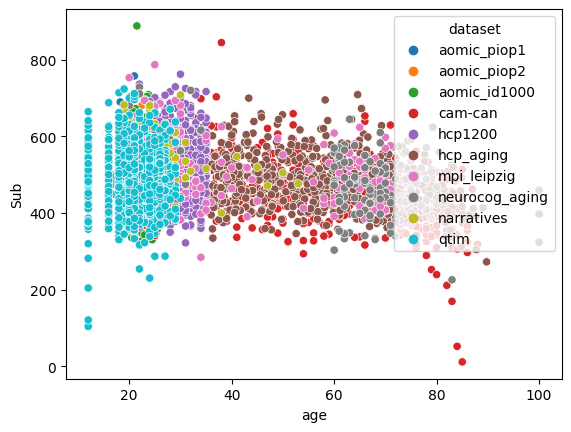

In [263]:
sns.scatterplot(data=vol_df[vol_df['hemi'] == 'L'],x='age',y='Sub',hue='dataset')

<AxesSubplot: xlabel='age', ylabel='DG'>

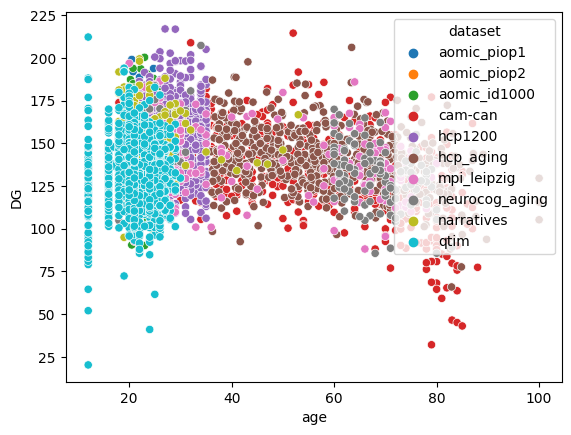

In [265]:
sns.scatterplot(data=vol_df[vol_df['hemi'] == 'L'],x='age',y='DG',hue='dataset')

<AxesSubplot: xlabel='age', ylabel='SRLM'>

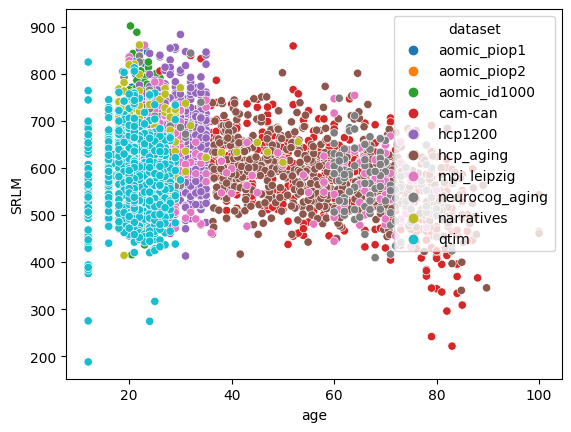

In [267]:
sns.scatterplot(data=vol_df[vol_df['hemi'] == 'L'],x='age',y='SRLM',hue='dataset')

<AxesSubplot: xlabel='age', ylabel='hippo_total'>

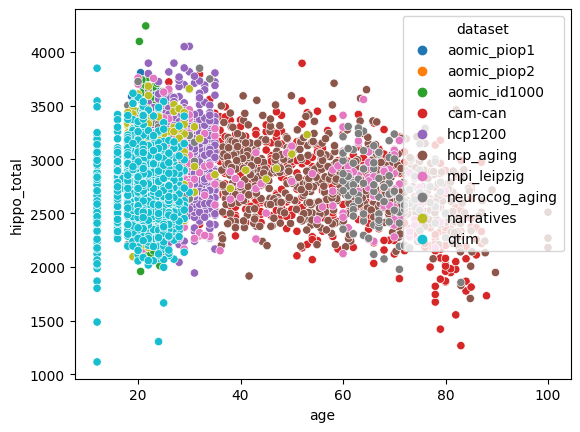

In [269]:
sns.scatterplot(data=vol_df[vol_df['hemi'] == 'L'],x='age',y='hippo_total',hue='dataset')

In [167]:
vol_df.to_csv('../data/training_data/Volume_master_dataset.csv')


,participant_id,age,sex,hemi,Sub,CA1,CA2,CA3,CA4,DG,SRLM,Cyst,hippo_total,site,dataset
0,sub-0036,23.75,F,L,572.665685,1090.624489,178.932618,418.839016,151.602189,176.876891,721.959016,10.723531,3322.223434,aomic_piop1,aomic_piop1
1,sub-0036,23.75,F,R,670.495406,1236.715774,125.183834,344.184465,214.774303,170.167332,822.819950,5.701701,3590.042765,aomic_piop1,aomic_piop1
2,sub-0162,18.75,M,L,683.416990,1123.781491,173.323434,446.851640,163.869428,176.397907,804.505122,13.020395,3585.166407,aomic_piop1,aomic_piop1
3,sub-0162,18.75,M,R,555.700526,1270.123183,171.929104,367.841519,208.980934,177.121130,795.410557,21.683435,3568.790388,aomic_piop1,aomic_piop1
4,sub-0033,23.25,F,L,489.951459,944.891617,143.246151,300.276279,209.876364,137.135255,602.589524,5.352778,2833.319425,aomic_piop1,aomic_piop1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,sub-0272,20.00,F,R,455.105577,884.200298,106.844002,266.968059,168.157498,119.097494,546.343066,12.491349,2559.207343,qtim2,qtim
10238,sub-1183,16.00,F,L,455.989762,923.434280,135.747293,338.106982,138.484473,141.574344,592.695451,18.968585,2745.001170,qtim1,qtim
10239,sub-1183,16.00,F,R,440.266571,952.999998,118.172949,301.571426,181.040835,142.843982,582.980424,27.135840,2747.012026,qtim1,qtim
10240,sub-1277,12.00,F,L,640.585612,872.517319,80.800344,243.840087,149.319218,115.885906,585.246666,20.268612,2708.463764,qtim1,qtim


In [185]:
vol_df.to_csv('../data/training_data/volume_master_training_dataset.csv')

In [20]:
vol_df = pd.read_csv('../data/training_data/volume_master_training_dataset.csv',index_col=0)

In [21]:
vol_df

,participant_id,age,sex,hemi,Sub,CA1,CA2,CA3,CA4,DG,SRLM,Cyst,hippo_total,site,dataset
0,sub-0036,23.75,F,L,572.665685,1090.624489,178.932618,418.839016,151.602189,176.876891,721.959016,10.723531,3322.223434,aomic_piop1,aomic_piop1
1,sub-0036,23.75,F,R,670.495406,1236.715774,125.183834,344.184465,214.774303,170.167332,822.819950,5.701701,3590.042765,aomic_piop1,aomic_piop1
2,sub-0162,18.75,M,L,683.416990,1123.781491,173.323434,446.851640,163.869428,176.397907,804.505122,13.020395,3585.166407,aomic_piop1,aomic_piop1
3,sub-0162,18.75,M,R,555.700526,1270.123183,171.929104,367.841519,208.980934,177.121130,795.410557,21.683435,3568.790388,aomic_piop1,aomic_piop1
4,sub-0033,23.25,F,L,489.951459,944.891617,143.246151,300.276279,209.876364,137.135255,602.589524,5.352778,2833.319425,aomic_piop1,aomic_piop1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,sub-0272,20.00,F,R,455.105577,884.200298,106.844002,266.968059,168.157498,119.097494,546.343066,12.491349,2559.207343,qtim2,qtim
10238,sub-1183,16.00,F,L,455.989762,923.434280,135.747293,338.106982,138.484473,141.574344,592.695451,18.968585,2745.001170,qtim1,qtim
10239,sub-1183,16.00,F,R,440.266571,952.999998,118.172949,301.571426,181.040835,142.843982,582.980424,27.135840,2747.012026,qtim1,qtim
10240,sub-1277,12.00,F,L,640.585612,872.517319,80.800344,243.840087,149.319218,115.885906,585.246666,20.268612,2708.463764,qtim1,qtim


In [8]:
snsx_df = pd.read_csv('/home/ROBARTS/myousif/graham/projects/ctb-akhanf/cfmm-bids/Khan/SNSX/master/participants_master.tsv', sep='\t')
snsx_epi_df = pd.read_csv('/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/snsx/snsx_data_collection.csv')

In [9]:
eplink_df = pd.read_csv('/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/eplink_phase3/eplink_participants_2024_01_09.tsv',sep='\t')

In [10]:
snsx_df.head()

,participant_id,age,sex,diagnosis,handedness,scanner
0,sub-C001,54.0,m,control,right,7T
1,sub-C002,33.0,m,control,right,7T
2,sub-C003,20.0,f,control,right,7T
3,sub-C004,30.0,m,control,right,7T
4,sub-C005,36.0,m,control,right,7T


In [66]:
snsx_epi_df2 = snsx_epi_df[['participant_id', 'age', 'sex', 'diagnosis', 'handedness',
                             'Focal', 'Generalized', 'Unknown', 'Temporal', 'Frontal', 
                             'Parietal','Insular', 'Occipital ', 'Bilobal', 'Right ', 
                             'Left', 'Other','Engel_IA', 'Engel_IB', 'Engel_IC',
                             'Engel_ID', 'Engel_IIA', 'Engel_IIB', 'Engel_IIC', 'Engel_IID',
                             'Engel_IIIA', 'Engel_IIIB', 'Engel_IVA', 'Engel_IVB', 'Engel_IVC',
                             'Engel_I=1', 'ilae_1', 'ilae_2', 'ilae_3', 'ilae_4', 
                             'ilae_5', 'ilae_6']]
snsx_epi_df2['mri_normal'] = snsx_epi_df['MRI (0=no/1=yes) Normal']
snsx_epi_df2['mri_mts'] = snsx_epi_df['MRI (0=no/1=yes) MTS']
snsx_epi_df2['lateralization'] = (snsx_epi_df[['Left','Right ','Bilobal']] * [1,2,3]).sum(axis=1,min_count=1)
snsx_epi_df2['mri_mts_location'] = snsx_epi_df2[['lateralization','mri_mts']].prod(axis=1,min_count=1)


/tmp/ipykernel_28764/549514762.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snsx_epi_df2['mri_normal'] = snsx_epi_df['MRI (0=no/1=yes) Normal']
/tmp/ipykernel_28764/549514762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snsx_epi_df2['mri_mts'] = snsx_epi_df['MRI (0=no/1=yes) MTS']
/tmp/ipykernel_28764/549514762.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [12]:
snsx_df

,participant_id,age,sex,diagnosis,handedness,scanner
0,sub-C001,54.0,m,control,right,7T
1,sub-C002,33.0,m,control,right,7T
2,sub-C003,20.0,f,control,right,7T
3,sub-C004,30.0,m,control,right,7T
4,sub-C005,36.0,m,control,right,7T
...,...,...,...,...,...,...
143,sub-P110,59.0,f,Parkinsons,right,3T
144,sub-P111,25.0,f,Epilepsy,right,3T
145,sub-P112,29.0,m,Eplepsy,right,3T
146,sub-P113,38.0,f,Epilepsy,right,7T


In [169]:
snsx_epi_df_cols = [snsx_epi_df2.columns[0]] + list(snsx_epi_df2.columns[5:])

In [170]:
snsx_all_df = pd.merge(snsx_df,snsx_epi_df2[snsx_epi_df_cols],on='participant_id',how='left')

In [171]:
snsx_vol_cols = [vol_dfs[0].columns[-1]] + list(vol_dfs[0].columns[1:-1])

NameError: name 'vol_dfs' is not defined

In [324]:
snsx_vol_df = pd.merge(vol_dfs[0][snsx_vol_cols],snsx_all_df, on='participant_id',how='left')

In [173]:
snsx_vol_df

,participant_id,hemi,Sub,CA1,CA2,CA3,CA4,DG,SRLM,Cyst,...,ilae_1,ilae_2,ilae_3,ilae_4,ilae_5,ilae_6,mri_normal,mri_mts,lateralization,mri_mts_location
0,sub-P065,L,630.742203,1095.912281,141.675039,421.587182,263.970543,166.337812,739.324256,41.339433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-P065,R,512.075543,1032.240396,130.890706,344.289316,202.737864,150.826991,630.262128,64.347135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-P072,L,395.809223,752.396667,427.027028,467.261774,166.088236,79.418156,563.654804,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0
3,sub-P072,R,295.618080,862.121192,89.965136,305.627636,166.732767,112.628283,554.453873,0.762993,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0
4,sub-P100,L,578.509185,879.764071,142.064633,335.706970,116.727675,135.769017,629.422566,0.131320,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,sub-P012,R,525.914053,1199.273287,141.973100,361.134184,216.536955,184.839020,710.652739,69.431368,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
280,sub-P101,L,470.690232,753.001199,90.715176,325.400297,104.954378,131.703141,516.950571,23.426030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,sub-P101,R,425.446006,945.302784,103.749194,281.393739,181.834961,141.148852,571.834794,33.232224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,sub-P117,L,473.676059,828.910103,105.032184,322.303666,128.869330,129.283356,563.971996,28.038740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
eplink_df

,participant_id,age,sex,handedness,focal_seizures,generalized_seizures,mesial_temporal_lobe_epilepsy,temporal_lobe_epilepsy,frontal_lobe_epilepsy,occipital_lobe_epilepsy,...,side_of_lesionectomy_surgery,lesionectomy,intraoperative_cortical_stimulation,MRGLITT_surgery,pathology_completed,ilae_hippocampal_sclerosis_classification,hippocampal_pathology_details,neocortical_pathology_details,Temporal,mri_mts
0,sub-HSC0001,10.0,Male,Right,Checked,Unchecked,No,No,Probable,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,sub-HSC0002,13.0,Female,Right,Checked,Unchecked,No,Possible,Possible,NaN,...,NaN,No,No,Yes,No,NaN,NaN,NaN,0,NaN
2,sub-HSC0003,8.0,Female,Right,Checked,Unchecked,No,Possible,No,No,...,NaN,No,No,Yes,No,NaN,NaN,NaN,0,0.0
3,sub-HSC0004,11.0,Female,Right,Checked,Unchecked,No,No,No,No,...,NaN,Yes,Yes,No,Yes,NaN,NaN,NaN,0,0.0
4,sub-HSC0005,12.0,Female,Right,Checked,Unchecked,No,Probable,No,Probable,...,Right,No,No,No,Yes,Type 1,Sections show poorly oriented hippocampus with...,"A. Resection, lateral temporal lobe - Subpial ...",1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,sub-TWH0081,41.0,Female,Right,Checked,Unchecked,Probable,Probable,Probable,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
136,sub-TWH0082,26.0,Male,Right,Checked,Unchecked,Possible,Definite,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
137,sub-TWH0084,27.0,Female,Right,Checked,Unchecked,No,No,Definite,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
138,sub-TWH0085,54.0,Male,Right,Checked,Unchecked,No,Definite,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [319]:
snsx_all_df

,participant_id,age,sex,diagnosis,handedness,scanner,Focal,Generalized,Unknown,Temporal,...,Engel_I=1,ilae_1,ilae_2,ilae_3,ilae_4,ilae_5,ilae_6,mri_normal,mri_mts,mri_mts_location
0,sub-C001,54.0,m,control,right,7T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-C002,33.0,m,control,right,7T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-C003,20.0,f,control,right,7T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-C004,30.0,m,control,right,7T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-C005,36.0,m,control,right,7T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,sub-P110,59.0,f,Parkinsons,right,3T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,sub-P111,25.0,f,Epilepsy,right,3T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,sub-P112,29.0,m,Eplepsy,right,3T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,sub-P113,38.0,f,Epilepsy,right,7T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
eplink_df['mri_1.5T_mts'].value_counts()

No     20
Yes     9
Name: mri_1.5T_mts, dtype: int64

In [216]:
eplink_df['mri_3T_mts'].value_counts()

No     34
Yes     7
Name: mri_3T_mts, dtype: int64

In [ ]:
eplink_df[

In [197]:
snsx_df.head()

,participant_id,age,sex,diagnosis,handedness,scanner
0,sub-C001,54.0,m,control,right,7T
1,sub-C002,33.0,m,control,right,7T
2,sub-C003,20.0,f,control,right,7T
3,sub-C004,30.0,m,control,right,7T
4,sub-C005,36.0,m,control,right,7T


In [23]:
epi_vol_paths = []
for idx, dset_path in enumerate(['/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/snsx/derivatives_7T/',
                           '/home/ROBARTS/myousif/graham/projects/ctb-akhanf/myousif9/norm_models/datasets/eplink_phase3/baseline/derivatives/']):
    dset_paths = glob(os.path.join(dset_path, 'hippunfold/hippunfold/sub-*/anat/sub-*_volumes.tsv'))
    epi_vol_paths.append(dset_paths)

In [24]:
epi_vol_dfs = []
for dset_idx, dset in enumerate(epi_vol_paths):
    dset_data = []
    for sub_idx, sub_vol  in enumerate(dset):
        dset_data.append(
            pd.read_csv(epi_vol_paths[dset_idx][sub_idx],sep='\t')
        )
        
    epi_vol_dfs.append(pd.concat(dset_data))

In [29]:
hippo_structs = ['Sub','CA1','CA2','CA3','CA4','DG','SRLM','Cyst']

In [34]:
for idx, df in enumerate(epi_vol_dfs):
    epi_vol_dfs[idx]['hippo_total'] = epi_vol_dfs[idx][hippo_structs].sum(axis=1)
    epi_vol_dfs[idx].reset_index(drop=True,inplace=True)
    epi_vol_dfs[idx] = epi_vol_dfs[idx].rename(columns={'subject':'participant_id'})

In [174]:
snsx_vol_df = pd.merge(epi_vol_dfs[0],snsx_all_df,on='participant_id',how='left')

In [108]:
def ipsilateral(df, hemi_col, lat_col):
    hemi = df[hemi_col]
    lat = df[lat_col]
    
    new_col = []
    for idx, hemi_indiv in enumerate(hemi):
        lat_indiv = lat.iloc[idx]
        
        if (lat_indiv == 0):
            new_col.append(0)
        elif (lat_indiv == 3):
            new_col.append(1)
        elif (lat_indiv == 1):
            if hemi_indiv == 'L':
                new_col.append(1)
            else:
                new_col.append(0)
        elif (lat_indiv == 2):
            if hemi_indiv == 'R':
                new_col.append(1)
            else:
                new_col.append(0)
        else:
            new_col.append(np.nan)
    
    return new_col

    

In [238]:
snsx_ipsilateral_df = snsx_vol_df.copy()
snsx_ipsilateral_df['ipsilateral_mts'] = ipsilateral(snsx_ipsilateral_df,'hemi','mri_mts_location')

In [239]:
snsx_ipsilateral_df['ipsilateral_lateralization'] = ipsilateral(snsx_ipsilateral_df,'hemi','lateralization')

In [240]:
snsx_ipsilateral_df['ipsilateral_TLE'] = snsx_ipsilateral_df[['Temporal','ipsilateral_lateralization']].prod(axis=1, min_count=1)

In [241]:
snsx_ipsilateral_df['control'] = (snsx_ipsilateral_df.diagnosis == 'control').replace(False,np.nan).replace(True,0)
snsx_ipsilateral_df['ipsilateral_TLE_control (TLE=1/cntrl=0)'] = snsx_ipsilateral_df['ipsilateral_TLE'].replace(0,np.nan)
snsx_ipsilateral_df['ipsilateral_TLE_control (TLE=1/cntrl=0)'] = snsx_ipsilateral_df[['ipsilateral_TLE_control (TLE=1/cntrl=0)','control']].prod(axis=1,min_count=1)

In [242]:
snsx_ipsilateral_df['non_epi_0'] = (snsx_ipsilateral_df.diagnosis == 'Epilepsy').replace(False,0).replace(True, np.nan)

In [243]:
snsx_ipsilateral_df['non_tle_epi_0'] = snsx_ipsilateral_df.Temporal.replace(1,np.nan)

In [245]:
snsx_ipsilateral_df['ipsilateral_TLE_non_epi (TLE=1/non-epi=0)'] = snsx_ipsilateral_df['ipsilateral_TLE'].replace(0,np.nan)
snsx_ipsilateral_df['ipsilateral_TLE_non_epi (TLE=1/non-epi=0)'] = snsx_ipsilateral_df[['ipsilateral_TLE_non_epi (TLE=1/non-epi=0)','non_epi_0']].prod(axis=1,min_count=1)

In [248]:
snsx_ipsilateral_df['ipsilateral_TLE_non_epi (TLE=1/non-tle-epi=0)'] = snsx_ipsilateral_df['ipsilateral_TLE'].replace(0,np.nan)
snsx_ipsilateral_df['ipsilateral_TLE_non_epi (TLE=1/non-tle-epi=0)'] = snsx_ipsilateral_df[['ipsilateral_TLE_non_epi (TLE=1/non-epi=0)','non_tle_epi_0']].prod(axis=1,min_count=1)

In [247]:
snsx_ipsilateral_df['ipsilateral_mts_control (TLE=1/cntrl=0)'] = snsx_ipsilateral_df['ipsilateral_mts'].replace(0,np.nan)
snsx_ipsilateral_df['ipsilateral_mts_control (TLE=1/cntrl=0)'] = snsx_ipsilateral_df[['ipsilateral_mts_non_epi (TLE=1/non-epi=0)','control']].prod(axis=1,min_count=1)

In [246]:
snsx_ipsilateral_df['ipsilateral_mts_non_epi (TLE=1/non-epi=0)'] = snsx_ipsilateral_df['ipsilateral_mts'].replace(0,np.nan)
snsx_ipsilateral_df['ipsilateral_mts_non_epi (TLE=1/non-epi=0)'] = snsx_ipsilateral_df[['ipsilateral_mts_non_epi (TLE=1/non-epi=0)','non_epi_0']].prod(axis=1,min_count=1)

In [251]:
snsx_ipsilateral_df['ipsilateral_mts_non_tle_epi (TLE=1/non-tle-epi=0)'] = snsx_ipsilateral_df['ipsilateral_mts'].replace(0,np.nan)
snsx_ipsilateral_df['ipsilateral_mts_non_tle_epi (TLE=1/non-tle-epi=0)'] = snsx_ipsilateral_df[['ipsilateral_mts_non_tle_epi (TLE=1/non-tle-epi=0)','non_tle_epi_0']].prod(axis=1,min_count=1)

In [254]:
snsx_ipsilateral_df['ipsilateral_mts_non_epi (TLE=1/non-epi=0)'].value_counts()

0.0    204
1.0     10
Name: ipsilateral_mts_non_epi (TLE=1/non-epi=0), dtype: int64

In [261]:
snsx_ipsilateral_df.drop(columns=['control','non_epi_0','non_tle_epi_0']).to_csv('../data/snsx_data/snsx_volume_ipsi_data.csv')

In [118]:
snsx_temporal_df[['Temporal','ipsilateral']]

KeyError: "['Temporal'] not in index"

In [120]:
snsx_temporal_df = snsx_vol_df['Temporal'].to_frame().copy()
snsx_temporal_df['ipsilateral'] = ipsilateral(snsx_vol_df,'hemi','lateralization')
snsx_vol_df['ipsilateral_Temporal'] = snsx_temporal_df[['Temporal','ipsilateral']].prod(axis=1,min_count=1)

0      NaN
1      NaN
2      1.0
3      1.0
4      1.0
      ... 
279    0.0
280    NaN
281    NaN
282    NaN
283    NaN
Length: 284, dtype: float64

In [107]:
snsx_vol_df['ipsilateral_'] = ipsilateral(snsx_vol_df,'hemi','lateralization')
eplink_vol_df[''] = ipsilateral(eplink_vol_df,'hemi','mri_mts_location'))

TypeError: insert() missing 2 required positional arguments: 'column' and 'value'

In [96]:
ipsilateral(eplink_vol_df,'hemi','mri_mts_location','ipsi_mts').value_counts()

ipsi_mts
0.0         66
1.0         10
dtype: int64

In [25]:
epi_vol_dfs2 = epi_vol_dfs.copy()



In [36]:
eplink_df['Temporal'] = eplink_df['temporal_lobe_epilepsy'].replace('No',0).replace('Possible',0).replace('Probable',1).replace('Definite',1)
eplink_df['mri_mts'] = eplink_df[['mri_1.5T_mts','mri_3T_mts']].replace('No',0).replace('Yes',1).sum(axis=1,min_count=1)

In [37]:
eplink_df['mri_mts']

0      0.0
1      NaN
2      0.0
3      0.0
4      0.0
      ... 
135    NaN
136    NaN
137    NaN
138    NaN
139    NaN
Name: mri_mts, Length: 140, dtype: float64

In [38]:

eplink_df['mri_mts_location'] = eplink_df[['mri_1.5T_mts_location','mri_3T_mts_location']].replace('Left',1).replace('Right',2).replace('Bilateral',3).sum(axis=1,min_count=1)
eplink_df['mri_mts_location'] = eplink_df[['mri_mts_location','mri_mts']].prod(min_count=1,axis=1)

In [39]:
eplink_df.head()

,participant_id,age,sex,handedness,focal_seizures,generalized_seizures,mesial_temporal_lobe_epilepsy,temporal_lobe_epilepsy,frontal_lobe_epilepsy,occipital_lobe_epilepsy,...,lesionectomy,intraoperative_cortical_stimulation,MRGLITT_surgery,pathology_completed,ilae_hippocampal_sclerosis_classification,hippocampal_pathology_details,neocortical_pathology_details,Temporal,mri_mts,mri_mts_location
0,sub-HSC0001,10.0,Male,Right,Checked,Unchecked,No,No,Probable,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0
1,sub-HSC0002,13.0,Female,Right,Checked,Unchecked,No,Possible,Possible,NaN,...,No,No,Yes,No,NaN,NaN,NaN,0,NaN,NaN
2,sub-HSC0003,8.0,Female,Right,Checked,Unchecked,No,Possible,No,No,...,No,No,Yes,No,NaN,NaN,NaN,0,0.0,0.0
3,sub-HSC0004,11.0,Female,Right,Checked,Unchecked,No,No,No,No,...,Yes,Yes,No,Yes,NaN,NaN,NaN,0,0.0,0.0
4,sub-HSC0005,12.0,Female,Right,Checked,Unchecked,No,Probable,No,Probable,...,No,No,No,Yes,Type 1,Sections show poorly oriented hippocampus with...,"A. Resection, lateral temporal lobe - Subpial ...",1,0.0,0.0


In [73]:
snsx_vol_df.mri_mts_location.value_counts()

0.0    62
3.0     6
1.0     6
2.0     2
Name: mri_mts_location, dtype: int64

In [51]:
snsx_vol_df.to_csv('../data/snsx_data/snsx_volume_data.csv')

In [64]:
snsx_vol_df.hemi

0      L
1      R
2      L
3      R
4      L
      ..
279    R
280    L
281    R
282    L
283    R
Name: hemi, Length: 284, dtype: object

In [65]:
snsx_vol_df.mri_mts_location

0      NaN
1      NaN
2      3.0
3      3.0
4      3.0
      ... 
279    0.0
280    NaN
281    NaN
282    NaN
283    NaN
Name: mri_mts_location, Length: 284, dtype: float64

In [52]:
eplink_vol_df = pd.merge(epi_vol_dfs[1],eplink_df,on='participant_id',how='left')

In [56]:
eplink_vol_df.mri_mts_location.value_counts()

0.0    60
1.0     8
3.0     4
2.0     4
Name: mri_mts_location, dtype: int64

In [62]:
eplink_vol_df.head()

,participant_id,hemi,Sub,CA1,CA2,CA3,CA4,DG,SRLM,Cyst,...,lesionectomy,intraoperative_cortical_stimulation,MRGLITT_surgery,pathology_completed,ilae_hippocampal_sclerosis_classification,hippocampal_pathology_details,neocortical_pathology_details,Temporal,mri_mts,mri_mts_location
0,sub-TWH0077,L,522.482650,976.824699,148.279027,349.114485,151.582443,154.197647,618.167012,6.920351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-TWH0077,R,499.851414,1058.206636,163.945034,323.080280,202.591293,153.829211,661.750379,0.313018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-TWH0052,L,428.468921,838.723995,106.308618,269.384494,167.656100,118.099447,539.388350,6.728877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-TWH0052,R,416.716987,929.782994,104.727862,246.730831,207.760005,117.626062,574.334376,7.734316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-HSC0004,L,389.993422,757.178636,120.156559,334.576786,170.911552,115.610303,523.542591,12.192583,...,Yes,Yes,No,Yes,NaN,NaN,NaN,0,0.0,0.0


In [ ]:
eplink_vol_df.to_csv('../data/eplink_data/eplink_volume_data.csv')

In [279]:
eplink_ipsilateral_df = eplink_vol_df.copy()
eplink_ipsilateral_df['ipsilateral_mts'] = ipsilateral(eplink_vol_df,'hemi','mri_mts_location')


In [280]:
eplink_ipsilateral_df['non_tle_epi_0'] = eplink_ipsilateral_df.Temporal.replace(1,np.nan)

In [281]:
eplink_ipsilateral_df['ipsilateral_mts_non_tle_epi (TLE=1/non-tle-epi=0)'] = eplink_ipsilateral_df['ipsilateral_mts'].replace(0,np.nan)
eplink_ipsilateral_df['ipsilateral_mts_non_tle_epi (TLE=1/non-tle-epi=0)'] = eplink_ipsilateral_df[['ipsilateral_mts_non_tle_epi (TLE=1/non-tle-epi=0)','non_tle_epi_0']].prod(axis=1,min_count=1)

In [284]:
eplink_ipsilateral_df.drop(columns=['non_tle_epi_0']).to_csv('../data/eplink_data/eplink_volume_data.csv')